# Random Forrests for Exploration of DEAP Dataset
Fingerprinting with OMA modes has worked really well. What about in tabular format?

Fingerprinting is good, try Quads

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

In [3]:
from fastai.tabular import *
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import datasets, svm, metrics, tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
path=pathlib.Path('/home/tris/Documents/EEG_data/DMD_DEAP')
path

PosixPath('/home/tris/Documents/EEG_data/DMD_DEAP')

In [5]:
path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s01.dat'
df_read = pickle.load(open(path, 'rb'), encoding='latin1')
labels=df_read['labels']
df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
df=df_tmp
for n in range (2,10):
    path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s0'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True)
for n in range (10,33):
    path = '/media/tris/tris_files/EEG_datasets/DEAP_data_preprocessed_python/s'+str(n)+'.dat'
    df_read = pickle.load(open(path, 'rb'), encoding='latin1')
    labels=df_read['labels']
    df_tmp = pd.DataFrame(labels, columns=['valence','arousal','dominance','liking'])
    df=df.append(df_tmp, ignore_index=True) 

In [6]:
df=df.div(9) #normalize
df.head()

,valence,arousal,dominance,liking
0,0.856667,0.844444,0.766667,0.870000
1,0.900000,0.812222,0.808889,0.941111
2,0.953333,0.837778,1.000000,0.786667
3,0.548889,0.667778,0.680000,0.895556
4,0.773333,0.435556,0.798889,0.672222


In [7]:
df=df.loc[df.index.repeat(4)].reset_index(drop=True)

In [8]:
df.tail()

,valence,arousal,dominance,liking
5115,0.443333,0.796667,0.538889,0.111111
5116,0.794444,0.447778,1.000000,0.208889
5117,0.794444,0.447778,1.000000,0.208889
5118,0.794444,0.447778,1.000000,0.208889
5119,0.794444,0.447778,1.000000,0.208889


In [9]:
filenames=[]
subject_labels=[]
for n in range (0,9):
    for i in range (0,9):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
    for i in range (9,160):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
for n in range (9,32):
    for i in range (0,9):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)
    for i in range (9,160):
        filename='S'+str(n+1)+'T'+str(i+1)
        filenames.append(filename)
        subject_label=n+1
        subject_labels.append(subject_label)

In [10]:
df['file_name']=filenames
df['subject_label']=subject_labels
df=df[['file_name','subject_label','valence','arousal']]
df.tail()

,file_name,subject_label,valence,arousal
5115,S32T156,32,0.443333,0.796667
5116,S32T157,32,0.794444,0.447778
5117,S32T158,32,0.794444,0.447778
5118,S32T159,32,0.794444,0.447778
5119,S32T160,32,0.794444,0.447778


In [11]:
df.loc[(df['valence'] >= 0.5) & (df['arousal'] >= 0.5), 'emotion_quad'] = 0
df.loc[(df['valence'] <= 0.5) & (df['arousal'] >= 0.5), 'emotion_quad'] = 1
df.loc[(df['valence'] <= 0.5) & (df['arousal'] <= 0.5), 'emotion_quad'] = 2  
df.loc[(df['valence'] >= 0.5) & (df['arousal'] <= 0.5), 'emotion_quad'] = 3
df.head()

,file_name,subject_label,valence,arousal,emotion_quad
0,S1T1,1,0.856667,0.844444,0.0
1,S1T2,1,0.856667,0.844444,0.0
2,S1T3,1,0.856667,0.844444,0.0
3,S1T4,1,0.856667,0.844444,0.0
4,S1T5,1,0.900000,0.812222,0.0


In [12]:
df=df.reset_index(drop=True); df

,file_name,subject_label,valence,arousal,emotion_quad
0,S1T1,1,0.856667,0.844444,0.0
1,S1T2,1,0.856667,0.844444,0.0
2,S1T3,1,0.856667,0.844444,0.0
3,S1T4,1,0.856667,0.844444,0.0
4,S1T5,1,0.900000,0.812222,0.0
...,...,...,...,...,...
5115,S32T156,32,0.443333,0.796667,1.0
5116,S32T157,32,0.794444,0.447778,3.0
5117,S32T158,32,0.794444,0.447778,3.0
5118,S32T159,32,0.794444,0.447778,3.0


In [13]:
path=pathlib.Path('/media/tris/tris_files/EEG_datasets/OMA/window')
path

PosixPath('/media/tris/tris_files/EEG_datasets/OMA/window')

In [14]:
df.to_csv(path/'labels_proc_window.csv', index=False)

In [15]:
df = pd.read_csv(path/'labels_proc_window.csv') #load labels
df.tail()

,file_name,subject_label,valence,arousal,emotion_quad
5115,S32T156,32,0.443333,0.796667,1.0
5116,S32T157,32,0.794444,0.447778,3.0
5117,S32T158,32,0.794444,0.447778,3.0
5118,S32T159,32,0.794444,0.447778,3.0
5119,S32T160,32,0.794444,0.447778,3.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f392bce08d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f392c89fe10>]], dtype=object)

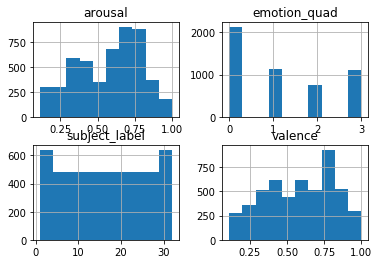

In [16]:
df.hist()

In [17]:
PATH = "/media/tris/tris_files/EEG_datasets/OMA/window"

In [18]:
df_raw = pd.read_csv('/media/tris/tris_files/EEG_datasets/OMA/window/OMA_deap_window_head.csv')
df_raw

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta5,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7
0,1,1,0.081948,-0.045425,-0.015341,-0.076406,0.171911,0.138256,-0.036334,-0.163510,...,-0.051060,-0.077595,-0.035316,0.044253,-0.011422,0.032761,0.036446,0.093352,0.019047,45.343738
1,1,2,0.049658,0.009936,0.017493,-0.036572,0.046062,0.030815,-0.004333,-0.053269,...,-0.313788,-0.102129,0.234990,0.556034,-0.339402,-0.340453,-0.097615,0.110119,0.011303,41.336668
2,1,3,0.168706,-0.067328,0.087951,-0.029108,0.285195,0.090563,-0.165873,-0.376551,...,0.178666,-0.025014,-0.349329,-0.488738,0.337106,0.338119,0.184487,-0.002215,0.019710,40.198276
3,1,4,-0.195931,0.064528,-0.073303,0.056689,-0.257539,-0.099162,0.151166,0.382519,...,0.200335,-0.001949,-0.208238,-0.534020,0.417333,0.369180,0.162184,-0.209589,0.009616,48.866446
4,1,5,-0.122429,0.024698,0.052268,0.085952,-0.197063,-0.162514,0.035680,0.108430,...,-0.178251,-0.066832,0.178333,0.325097,-0.204320,-0.241421,-0.034872,0.097101,0.006341,47.811462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5115,32,156,-0.357643,-0.491085,0.209572,-0.171950,0.338017,0.007259,0.585254,0.222424,...,0.130738,0.157728,-0.073260,0.035155,-0.099400,-0.010219,-0.206379,-0.079857,0.014983,30.739507
5116,32,157,-0.358014,-0.582069,0.212574,-0.247489,0.437359,0.003154,0.714734,0.266580,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,28.682687
5117,32,158,-0.379006,-0.487530,0.214247,-0.157777,0.327218,0.016778,0.575243,0.213227,...,-0.015303,-0.231798,0.010316,-0.188196,0.253593,-0.023508,0.315596,0.116271,0.032695,26.565669
5118,32,159,0.111528,0.150362,-0.060776,0.045534,-0.100818,-0.012377,-0.170067,-0.047020,...,0.194464,0.271677,-0.133987,0.107742,-0.205606,0.007676,-0.341775,-0.160257,0.007078,27.228309


In [19]:
emotion_quad = df['emotion_quad']
# df_learn = df_raw.join(emotion_quad)
df_learn=df_raw

In [20]:
df_learn.iloc[[40],:]

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta5,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7
40,1,41,0.039184,0.058918,-0.065916,-0.123054,0.146321,0.102099,0.081156,-0.021269,...,-0.03036,-0.036511,0.167833,0.226212,-0.148387,-0.210056,-0.299728,-0.136652,0.008732,45.824037


In [21]:
os.makedirs('tmp', exist_ok=True)
df_learn.to_feather('tmp/eeg-raw')

In [22]:
import pandas as pd
df_raw = pd.read_feather('tmp/eeg-raw') #lol raw sashimis and sushis
df_raw.head()

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta5,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7
0,1,1,0.081948,-0.045425,-0.015341,-0.076406,0.171911,0.138256,-0.036334,-0.163510,...,-0.051060,-0.077595,-0.035316,0.044253,-0.011422,0.032761,0.036446,0.093352,0.019047,45.343738
1,1,2,0.049658,0.009936,0.017493,-0.036572,0.046062,0.030815,-0.004333,-0.053269,...,-0.313788,-0.102129,0.234990,0.556034,-0.339402,-0.340453,-0.097615,0.110119,0.011303,41.336668
2,1,3,0.168706,-0.067328,0.087951,-0.029108,0.285195,0.090563,-0.165873,-0.376551,...,0.178666,-0.025014,-0.349329,-0.488738,0.337106,0.338119,0.184487,-0.002215,0.019710,40.198276
3,1,4,-0.195931,0.064528,-0.073303,0.056689,-0.257539,-0.099162,0.151166,0.382519,...,0.200335,-0.001949,-0.208238,-0.534020,0.417333,0.369180,0.162184,-0.209589,0.009616,48.866446
4,1,5,-0.122429,0.024698,0.052268,0.085952,-0.197063,-0.162514,0.035680,0.108430,...,-0.178251,-0.066832,0.178333,0.325097,-0.204320,-0.241421,-0.034872,0.097101,0.006341,47.811462


In [23]:
df_raw.iloc[[100],:]

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta5,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7
100,1,101,0.295503,0.263211,-0.36884,-0.054941,0.174653,0.174065,-0.052186,-0.331137,...,-0.111255,-0.000796,0.111426,0.104641,-0.112401,-0.103564,0.01163,0.13046,0.002736,49.569047


Text(0.5, 1.0, 'zeta6')

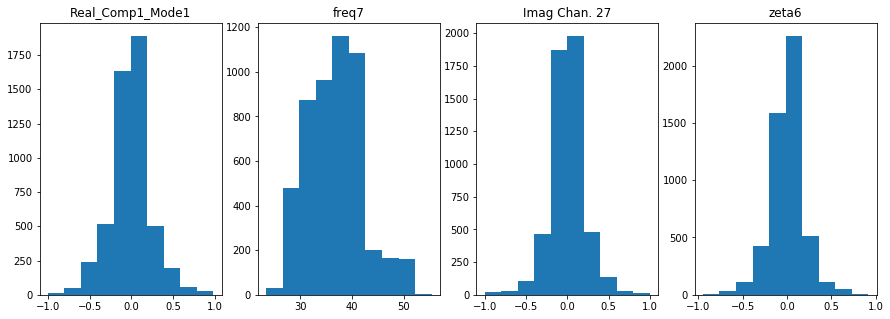

In [24]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].hist(df_raw.Real_Comp1_Mode1)
axs[0].set_title('Real_Comp1_Mode1')
axs[1].hist(df_raw.fn7)
axs[1].set_title('freq7')
axs[2].hist(df_raw.Imag_Comp1_Mode3)
axs[2].set_title('Imag Chan. 27')
axs[3].hist(df_raw.zeta6)
axs[3].set_title('zeta6')

In [47]:
df1_raw = df_raw[(df_raw['Subject'] == 20)]
df1_raw

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,zeta5,zeta6,zeta7,fn1,fn2,fn3,fn4,fn5,fn6,fn7
3040,20,1,-0.056983,0.121494,0.122826,0.370707,0.259455,0.268945,-0.072952,-0.423519,...,-0.011264,0.006614,0.030698,0.128073,0.040066,0.036141,-0.018530,-0.084185,0.017676,39.917840
3041,20,2,-0.051022,0.107672,0.110119,0.357124,0.211579,0.263696,-0.118687,-0.330177,...,0.027428,-0.046467,-0.053315,-0.177649,-0.111414,-0.144880,0.071104,0.162073,0.034191,41.942799
3042,20,3,0.026027,0.067860,0.057757,0.180407,0.136766,0.129509,-0.047773,-0.210255,...,0.052946,-0.067048,-0.078516,-0.203363,-0.120417,-0.160872,0.062376,0.203119,0.013242,38.700241
3043,20,4,-0.015422,0.039077,0.042744,0.124100,0.086355,0.089485,-0.027165,-0.136750,...,-0.029321,-0.043078,-0.002096,-0.083490,-0.081462,-0.078701,0.022817,0.119484,0.016707,40.619493
3044,20,5,-0.035802,0.106297,0.109939,0.314577,0.194122,0.234018,-0.114754,-0.300023,...,-0.023527,0.042607,0.046197,0.168223,0.087952,0.116776,-0.068602,-0.134462,0.025168,43.002914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,20,156,-0.130403,-0.040159,-0.007582,-0.001925,-0.042419,0.124117,0.110720,0.089664,...,0.268996,0.102377,-0.120604,-0.230765,0.223091,-0.144767,-0.222682,-0.257049,0.024634,40.030387
3196,20,157,-0.391796,-0.162019,-0.036077,-0.006733,-0.126669,0.421110,0.372316,0.280346,...,-0.375279,-0.255828,-0.120273,0.093641,-0.099482,0.352651,0.380970,0.222986,0.014899,41.602871
3197,20,158,-0.413344,-0.174920,-0.035365,0.000787,-0.138799,0.449982,0.373947,0.282735,...,-0.128977,-0.068554,-0.065211,0.060042,-0.040111,0.144089,0.165944,0.092236,0.010396,39.646926
3198,20,159,-0.334815,-0.134735,-0.016694,0.001096,-0.125259,0.370330,0.302659,0.229224,...,0.174808,0.108698,0.061634,0.000600,0.032620,-0.213247,-0.196300,-0.084683,0.019365,39.772735


In [48]:
emotion_quad1 = emotion_quad[(df['subject_label'] == 20)]
emotion_quad1

3040    0.0
3041    0.0
3042    0.0
3043    0.0
3044    0.0
       ... 
3195    0.0
3196    3.0
3197    3.0
3198    3.0
3199    3.0
Name: emotion_quad, Length: 160, dtype: float64

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    df1_raw, emotion_quad1, test_size=0.2, shuffle=True)

In [58]:
classifier = AdaBoostClassifier(n_estimators=5)

In [59]:
classifier.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=5)

In [60]:
predicted = classifier.predict(X_test)

Classification report for classifier AdaBoostClassifier(n_estimators=5):
              precision    recall  f1-score   support

         0.0       0.83      0.26      0.40        19
         1.0       0.54      0.88      0.67         8
         2.0       1.00      0.33      0.50         3
         3.0       0.08      0.50      0.14         2

    accuracy                           0.44        32
   macro avg       0.61      0.49      0.43        32
weighted avg       0.73      0.44      0.46        32


Confusion matrix:
[[ 5  3  0 11]
 [ 1  7  0  0]
 [ 0  2  1  0]
 [ 0  1  0  1]]


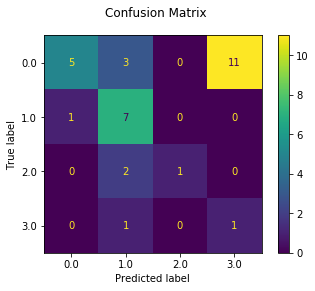

In [61]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [62]:
classifier = svm.SVC(gamma=0.2, kernel='poly', degree=5)

In [55]:
classifier.fit(X_train, y_train)

SVC(degree=5, gamma=0.2, kernel='poly')

In [56]:
predicted = classifier.predict(X_test)

Classification report for classifier SVC(degree=5, gamma=0.2, kernel='poly'):
              precision    recall  f1-score   support

         0.0       0.71      0.53      0.61        19
         1.0       0.45      0.62      0.53         8
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         2

    accuracy                           0.47        32
   macro avg       0.29      0.29      0.28        32
weighted avg       0.54      0.47      0.49        32


Confusion matrix:
[[10  4  1  4]
 [ 2  5  0  1]
 [ 1  1  0  1]
 [ 1  1  0  0]]


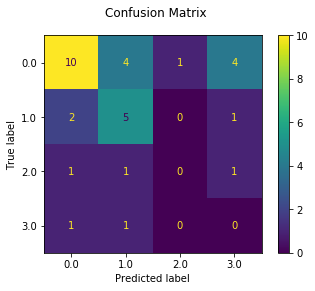

In [57]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)